# Сборный проект - 1

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть не полными

**ЦЕЛИ ПРОЕКТА:**

1. Загрузка данных
  * Иморт всех необходимых библиотек
  * импорт файла Игры  - /datasets/games.csv  
  * Первичное знакомство с данными, оценим количество пропусков и качество предоставленных данных
2. Предобработка данных
3. Исследовательский анализ данных:
  * сколько игр выпускалось в разные годы;
  * как менялись продажи по платформам;
  * определить актуальный для прогноза на 2017 год период;
  * какие платформы лидируют по продажам, выбрать несколько потенциально прибыльных платформ;
  * построить диаграмму размаха по глобальным продажам игр в разбивке по платформам;
  * как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
  * общее распределение игр по жанрам
4. Портрет пользователя каждого региона
  * самые популярные платформы (топ-5)
  * самые популярные жанры (топ-5)
  * Влияет ли рейтинг ESRB на продажи в отдельном регионе
5. Проверка гипотез
  * средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  * средние пользовательские рейтинги жанров Action и Sports разные
6. Общий вывод и рекомендации


# Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [ ]:
#прочитаем файл
data_games = pd.read_csv('/datasets/games.csv')

In [ ]:
#ознакомимся с датафреймом
data_games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
#посмотрим общую информацию о датафрейме
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
#Посчитаем количество пустых значений
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
#посмотрим наличие явных дубликатов
data_games.duplicated().sum()

0

**Вывод**\
Из первичного знакомства с данными видим, что:
* названия столбцов  не корректны (с разным регистром)
* в некоторых столбцах есть пропуски, больше всего пропусков в столбцах с рейтингом и оценкой
* в некоторых столбцах тип данных не соответствует
* явных дубликатов нет

# Шаг 2. Подготовьте данные

**2.1 Замените названия столбцов (приведите к нижнему регистру)**

In [ ]:
#выведем все названия столбцов
data_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
#приведем все названия к нижнему регистру
data_games.columns = data_games.columns.str.lower()
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Столбцы успешно приведены к нижнему регистру

**2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему**

In [ ]:
# посмотрим типы данных в столбцах
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* в столбце `year_of_release`  нужно изменить тип данных на 'int', год - это целое число
* в столбце `user_score` на тип данных 'float',поскольку  рейтинг пользователей указан вещественным числом, выясним почему тип данных 'object'

In [ ]:
#ознакомимся с уникальными значениями столбца `year_of_release`
data_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Год выпука игры `year_of_release`- это целые числа, заменим тип данных на `Int`

In [ ]:
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')

In [ ]:
#проверим что тип данных изменен
data_games['year_of_release'].dtype

Int64Dtype()

In [ ]:
#Посмотрим уникальные значениея столбца
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В уникальных значениях столбца с оценкой пользователей  кроме числовых и пропущенных значений, есть значение 'tbd'.\
**'tbd'** расшифровывается как **`to be determined`** (пока не определён),это значение можем заменить на nan

Также, столбце **`user_score`** тип данных необходмо заменить  с `object`на  `float`, поскольку это оценка пользователей - вещественное число.

In [ ]:
#воспользуемся параметром ''.to_numeric'
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors ='coerce',downcast ='float')
data_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7], dtype=float32)

In [ ]:
#посмотим результат изменения типов данных
data_games['user_score'].dtype

dtype('float32')

Замена типов данных в выбранных столбцах успешно происзведена.

**2.3 Обработайте пропуски при необходимости:**
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;


Изучим пропуски в данных и посмотрим, какие пропуски сможем восстановить.

In [ ]:
#посмотрим на количество пропусков и описание данных
display(data_games.isna().sum())
data_games.describe()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


в столбцах `name` и  `genre` видим по 2 пропуска, ознакомимся, возможно их оставим без изменения \
в столбце `year_of_release` - 269 пропусков, посмотрим, возможно ли восстановить пропуски \
в столбцах `critic_score` и `user_score` - оценочные данные критиков и пользователей, будет не корректно заменять их средним значением, медианой или нулем\
в столце `rating` значение устанавливается при релизе игры (негосударственного организацией ESRB), мы также не сможем корректно заполнить значения самостоятельно.


In [ ]:
#изучим пропуски в столбцах с названием и жанром
data_games_name = data_games[data_games['name'].isna()]
data_games_genre = data_games[data_games['genre'].isna()]
display(data_games_name,data_games_genre)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что те самы 2 пропуска в столбцах `name` и `genre` в одних и тех же строках (с индексами  659 и 14244), эти строки можем удалить, в них мало информации.
Появления пропусков  в данных столбцах  возможно связан с тем, что у игр не было утверждено официальное назнвание, или технический сбой при внесении данных

In [ ]:
data_games.drop([659, 14244], inplace=True)
data_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [ ]:
#пропущенные значение year_of_release
data_games[data_games['year_of_release'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим, возможно ли заменить год выпуска игры, ориентируясь на год выпуска на других платформах
возьмем рандомно названия трех игр с пропущенным значением

In [ ]:
data_games.query('name==["Madden NFL 2004","FIFA Soccer 2004","Freaky Flyers"]')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
2606,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E
10551,Freaky Flyers,PS2,2003,Racing,0.05,0.04,0.00,0.01,66.0,NaN,T
12029,FIFA Soccer 2004,GC,2003,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E
14532,Freaky Flyers,XB,2003,Racing,0.02,0.01,0.00,0.00,64.0,NaN,T


На разных платформах игры выходили в один год, думаю будет корректно заменить пропуск на год выпускатой жк игры на других платформах

Напишем цикл, с помощью которого заполним возможные пропуски даты релиза игр
через индексы строк с пропущенными значениями в `year_of_release` находим максимальное значение года релиза
для всех строк, у которых значение `name` совпадает

In [ ]:
for i in data_games[data_games['year_of_release'].isnull() == True].index:
    data_games['year_of_release'][i] = data_games.loc[data_games['name'] == data_games['name'][i], 'year_of_release'].max()

In [ ]:
data_games['year_of_release'].isna().sum()

146

С помощью цикла  смогли восстановить 123 пропущенных значения. \
Оставшиеся пропущенные значения оставим без изменения.

В целом пропуски в этом столбце могли возникнуть из-за отсутсвия информации о точно годе выпуска игры, при внесении данных или по причине технологической ошибки

In [ ]:
#посмотрим на столбец 'rating' и сможем ли мы как-то заменить пропуски
print(data_games['rating'].isna().sum())
print()
data_games['rating'].unique()

6764



array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Поскольку  возрастной рейтинг игр определяется негосударственной организацией ESRB до релиза игры,пропуски могли возникнуть по причине технической ошибке при выгрузке или по какой то причине рейтинг не был определен данной организацией.\
В столбце с рейтингом много пропущенных значений, удалить мы их не сможем.

Заменим пропуски  -'unknown'

In [ ]:
data_games['rating']= data_games['rating'].fillna('unknown')
#выведем обновленные уникальные значения и проверим что все пропуски заменили
display(data_games['rating'].unique())
data_games.isna().sum()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

**2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец**

In [ ]:
#добавим новый столбец в датафрейм с cуммой всех продаж и выведем первые 10 строк
data_games['total_sales'] = data_games['na_sales']+data_games['eu_sales']+data_games['jp_sales']+data_games['other_sales']
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


**Вывод**
Подведем итоги предобработки данных и подготовки к дальнейшему анализую
* наименование столбцов привели  к нижнему регистру
* Типы данных в столбце `year_of_release` изменили на целочисленный тип  - 'int', в столбце `user_score` на вещественный тип - 'float'
* Были найдены и обработаны возможные пропуски:
  * избавились от 2х пропусков в столбцах `genre` и`name`
  * в столбце `year_of_release` смогли заменить часть значений c помощью цикла
  * в столбцах `critic_score`,`user_score` и `rating` - пропуски оставили без изменений
  
* добавили новый столбец с суммарной выручкой продаж по всем регионам  - `total_sales`


# Шаг 3. Проведите исследовательский анализ данных

**3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [ ]:
#создадим сводную таблицу и посмотрим количество игр по годам выпуска
count_game_of_year = data_games.pivot_table(index= 'year_of_release',values='name',aggfunc='count')
count_game_of_year.columns = ['games_count']
count_game_of_year

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


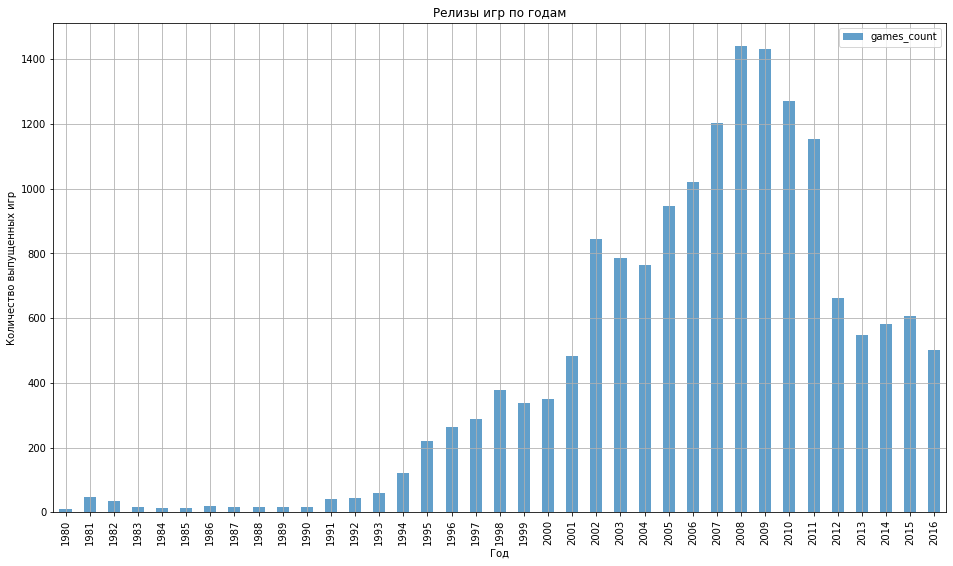

In [ ]:
#построим диаграмму
count_game_of_year.plot(kind='bar',stacked=True, figsize=(16,9),grid=True, alpha=0.7)
plt.title('Релизы игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр');

Из полученных данных мы видим, несмотря на то, что игровая индустрия зародилас достаточно давно(даже задолго до 80-х), ее активное развитие началось в средине 90-х. Думаю это связанно с активным развитием цифровых технологий в тот период. \
Стремительный рост наблюдаем в развитии индустрии с 2002 по 2011 года. Думаю этому поспособствовало широкое распространиение интернета и технологиеческие возможности для разработки(новые мощные процессоры и развитие техгнологий в целом). \
Спад игровой индустрии в 2012 может быть обучловлен перенасыщением рынка, а также более строгими требованиями к разработке игр.\
Период до 1995 года можно  считать не актуальным для нашего анализа


**3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [ ]:
#для начала создадим новый датафрейм и отфильтруем данные с 1995 года
data_games_2 = data_games.query('year_of_release >= 1995')
data_games_2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


In [ ]:
#cоздадим сводную таблицу и посмотрим рейтинг платформ по сумме продаж
platform_sales = data_games_2.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',
                                                                                                         ascending=False)
platform_sales

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.26
PS,721.55
PS4,314.14
GBA,313.73
PSP,293.57


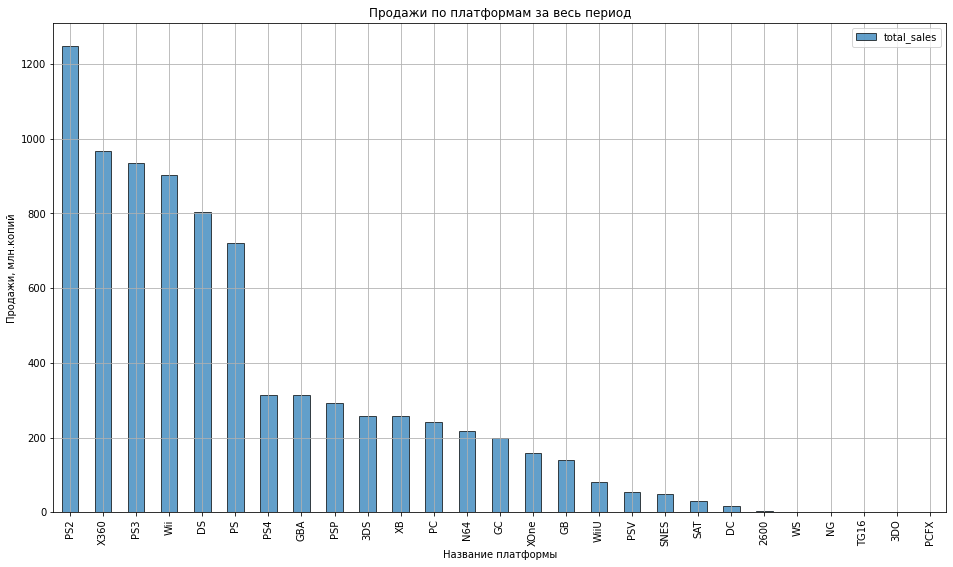

In [ ]:
#визуализируем данные с помощью диаграммы
platform_sales.plot(kind='bar',stacked=True, figsize=(16,9),grid=True, alpha=0.7, edgecolor="k")
plt.title('Продажи по платформам за весь период')
plt.xlabel('Название платформы')
plt.ylabel('Продажи, млн.копий');


Из полученных данных видно, что есть 6 платформ, которые лидируют в рейтинге по продажам, это - PS2,X360,PS3,Wii,DS,PS.
Создадим новый датафрейм с топ- 6 платформ и построим распределение по годам

In [ ]:
#выведем сводную таблицу со срезом данных для 6 платформ с наибольшей общей выручкой
top_platform_year = data_games_2.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]').pivot_table(index='year_of_release',
                                                                                                     columns ='platform',
                                                                                                     values='total_sales',
                                                                                                     aggfunc='sum').fillna(0)
top_platform_year

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1995,0.00,35.96,0.00,0.00,0.00,0.00
1996,0.00,94.70,0.00,0.00,0.00,0.00
1997,0.00,136.17,0.00,0.00,0.00,0.00
1998,0.00,169.49,0.00,0.00,0.00,0.00
1999,0.00,144.53,0.00,0.00,0.00,0.00
2000,0.00,96.37,39.17,0.00,0.00,0.00
2001,0.00,35.59,166.43,0.00,0.00,0.00
2002,0.00,6.67,208.36,0.00,0.00,0.00
2003,0.00,2.07,193.05,0.00,0.00,0.00


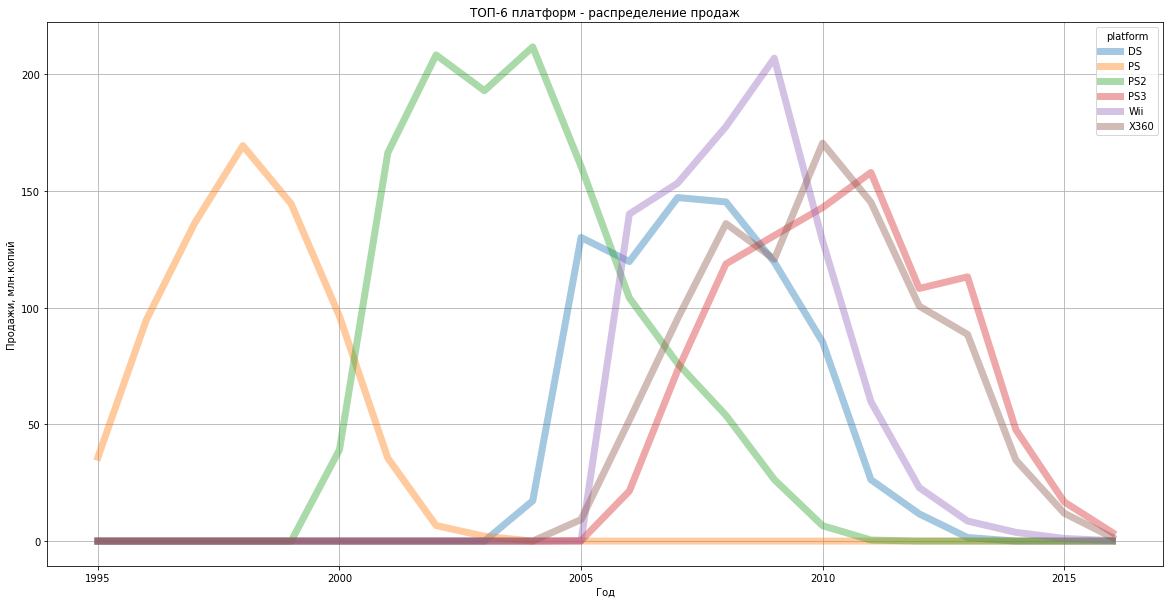

In [ ]:
#посмотрим как распределяются продажи и есть ли закономерность
top_platform_year.plot(grid=True,figsize = (20,10),linewidth= 7,alpha=0.4)
plt.title('ТОП-6 платформ - распределение продаж')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.копий');


Анализируя полученные данные, видно, как происходила смена одной актуальной платформы на другую по мере развития технологий и индустрии. Каждая платформа проживает подъем, пик и спад продаж.\
Можно сказать, что в среднем актуальность платформ 8 - 10 лет.
Наиболее популярными платформами  можно считать Xbox и Sony Playstation, в средем пик продаж наступает спустя 3-5 лет после выхода новой платформы(приставки)

**3.3	Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. \
Не учитывайте в работе данные за предыдущие годы.**

Для построения прогноза на 2017 год, предлагаю выделить актуальный период  - с 2012 по 2016 год \
Создадим новый датафрейм с данными за этот период


In [ ]:
actual_data_games = data_games.query('year_of_release >= 2012')
actual_data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [ ]:
actual_data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2899 non-null   object 
 1   platform         2899 non-null   object 
 2   year_of_release  2899 non-null   Int64  
 3   genre            2899 non-null   object 
 4   na_sales         2899 non-null   float64
 5   eu_sales         2899 non-null   float64
 6   jp_sales         2899 non-null   float64
 7   other_sales      2899 non-null   float64
 8   critic_score     1322 non-null   float64
 9   user_score       1540 non-null   float32
 10  rating           2899 non-null   object 
 11  total_sales      2899 non-null   float64
dtypes: Int64(1), float32(1), float64(6), object(4)
memory usage: 285.9+ KB


**•	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

Чтобы выбрать потенциально прибыльнаые платформы, создадим сводную таблицу  по данным за выбранный актуальный период и построим визуализацию

In [ ]:
actual_platform_year = actual_data_games.pivot_table(index='year_of_release', columns ='platform',values='total_sales',
                                                     aggfunc='sum').fillna(0)
actual_platform_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.76,11.67,23.45,108.28,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


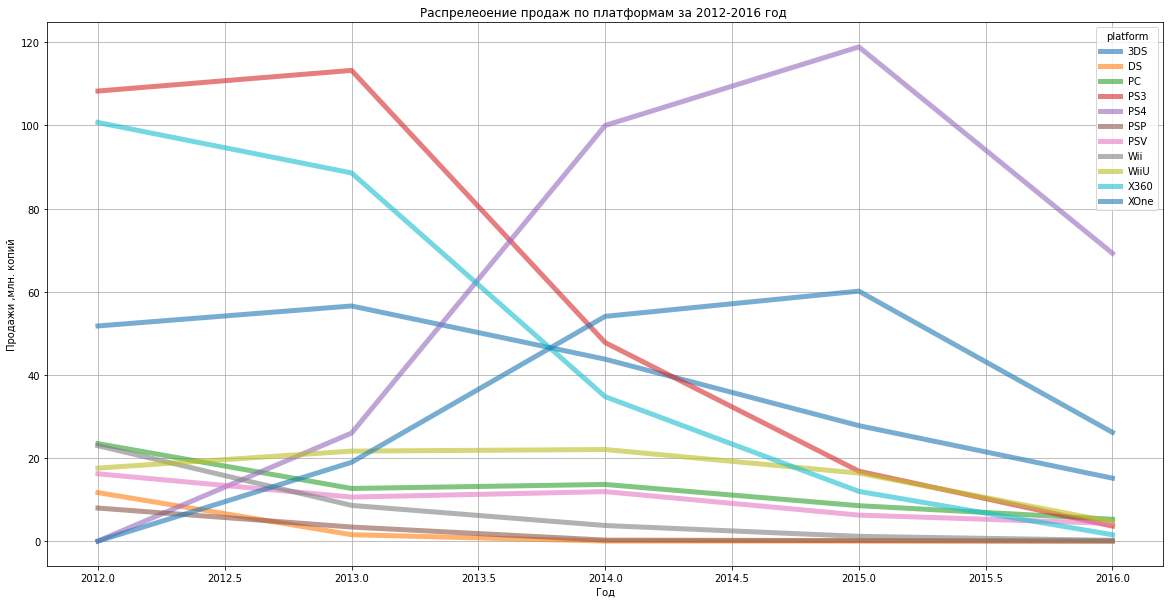

In [ ]:
#построим график и посмотрим потенциально прибыльные платформы на ближайшее будущее
actual_platform_year.plot(grid=True,figsize = (20,10),linewidth= 5,alpha=0.6)
plt.title('Распрелеоение продаж по платформам за 2012-2016 год ')
plt.xlabel('Год')
plt.ylabel('Продажи ,млн. копий');

*Из графика можно сказать:*
* потенциально прибыльными можно считать платформы  PS4 и XOne, также шансы есть у платформы 3DS
* платформы предыдущих поколейний и не только (PC,PS3,PSV,Wii,WiiU,X360) идут на спад в числе продаж
* продажи по платформам DS и PSP совсем упали на 2016 год.

Учитывая, что за последний год предоставлены не все актуальные данные, будем работать с тем что имеем



**3.4 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

будем использовать отфильтрованные данные из датафрейма `actual_data_games`

In [ ]:
#выведем описание данных по всем платформам
actual_data_games.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,397.0,0.491209,1.385416,0.01,0.040,0.11,0.320,14.60
DS,32.0,0.412812,1.416559,0.01,0.020,0.05,0.195,8.06
PC,255.0,0.249059,0.490149,0.01,0.030,0.08,0.240,5.14
PS3,494.0,0.586457,1.461448,0.01,0.050,0.20,0.610,21.05
PS4,392.0,0.801378,1.609456,0.01,0.060,0.20,0.730,14.63
PSP,175.0,0.066800,0.073594,0.01,0.020,0.04,0.090,0.36
PSV,411.0,0.119659,0.203011,0.01,0.020,0.05,0.120,1.96
Wii,55.0,0.665455,1.157206,0.01,0.065,0.18,0.790,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.080,0.22,0.525,7.09


In [ ]:
#создадим срез данных по 3м наиболее перспективным платформам и выведем описание данных
actual_data_games_top = actual_data_games.query('platform==["PS4","XOne","3DS"]')
actual_data_games_top.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,397.0,0.491209,1.385416,0.01,0.04,0.11,0.320,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


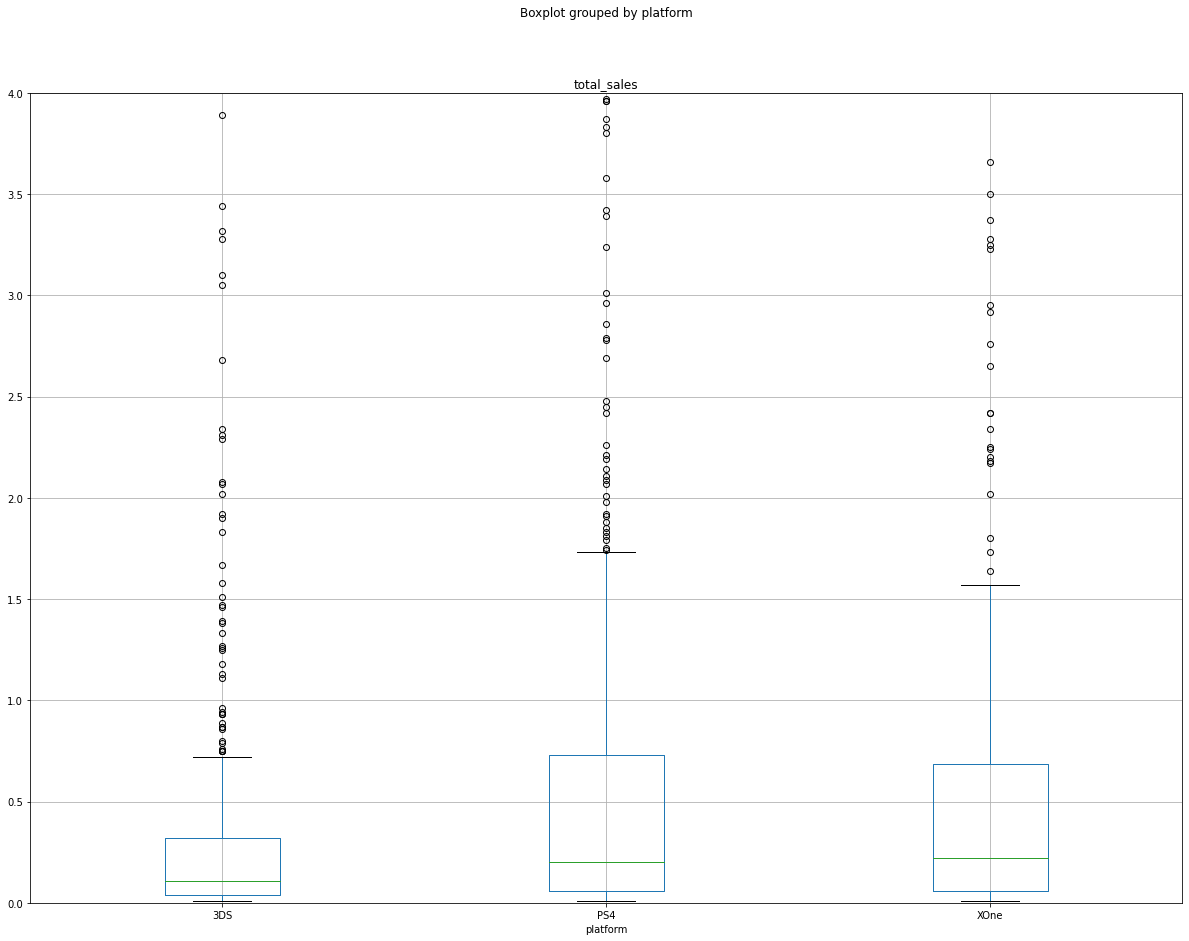

In [ ]:
#построим "ящик с усами" для потенциально перспективных платформ
actual_data_games_top.boxplot(column = 'total_sales',by='platform',figsize=(20, 15))
plt.ylim([0, 4]);

* медианное значение у платформ PS4 и XOne практически одинаковое
* у платформы 3Ds медианное значение несколько ниже, но количество выпущенных игр достачно велико(возможно в силу особенности платформы - это портативная приставка имеющая иные требования для разработки)
* у каждой платвормы есть игры-бесцеллеры, продажи которых превышают "нормальные" значения

**•	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

**Рассмотрим влияние отзвов на продажи внутри платформы PS4**

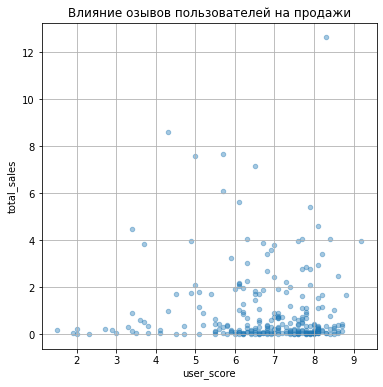

In [ ]:
#построим диаграмму рассеяния и посмотрим влияют ли отзывы пользователей на продажи
actual_data_games.query('platform == "PS4"').plot(x='user_score', y='total_sales',kind='scatter',
                                                  alpha=0.4, figsize=(6,6), grid=True)
plt.title('Влияние озывов пользователей на продажи');

In [ ]:
#рассчитаем коэффициент корреляции между общими проддажами и отзывами пользователей PS4
corr_user = actual_data_games.query('platform == "PS4"')['total_sales'].corr(actual_data_games.query('platform == "PS4"')
                                                                 ['user_score'])
print('Корреляция между user_score и total_sales для платформы "PS4":', corr_user)

Корреляция между user_score и total_sales для платформы "PS4": -0.031957109005188264


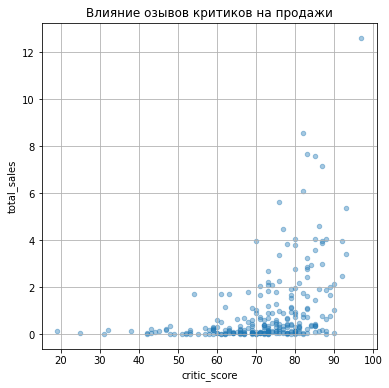

In [ ]:
#построим диаграмму рассеяния для оценки влияния отзывов клитиков  на продажи
actual_data_games.query('platform == "PS4"').plot(x='critic_score', y='total_sales',kind='scatter',
                                                  alpha=0.4, figsize=(6,6), grid=True)
plt.title('Влияние озывов критиков на продажи');

In [ ]:
#рассчитаем корреляцию между общими проддажами и отзывами критиков PS4
corr_critic= actual_data_games.query('platform == "PS4"')['total_sales'].corr(actual_data_games.query('platform == "PS4"')
                                                                              ['critic_score'])
print('Корреляция между critic_score и total_sales для платформы "PS4":',corr_critic)

Корреляция между critic_score и total_sales для платформы "PS4": 0.406567902061781


* Влияние отзывов пользователей на показатели продаж отсутствует
* Влияние отзывов критиков на продаже имется, но слабое

**•	Соотнесите выводы с продажами игр на других платформах.**

**для сравнение рассчитаем кореляцию  между продажами игр на платформах XOne и 3DS и оценками, а также построим диаграммы диаграммы рассеяния**

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


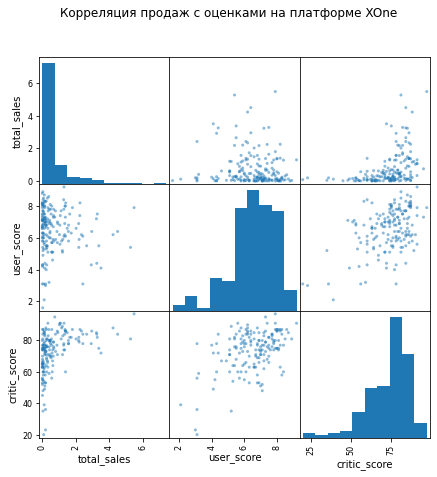

In [ ]:
# Вычислим корреляции для  для платформы 'XOne' и построим  диаграмму
corr_xone =  actual_data_games.query('platform == "XOne"')[['total_sales','user_score', 'critic_score']]

pd.plotting.scatter_matrix(corr_xone, figsize=(7, 7));
plt.suptitle ('Корреляция продаж с оценками на платформе XOne')
corr_xone.corr()


,total_sales,user_score,critic_score
total_sales,1.000000,0.198150,0.320458
user_score,0.198150,1.000000,0.721517
critic_score,0.320458,0.721517,1.000000


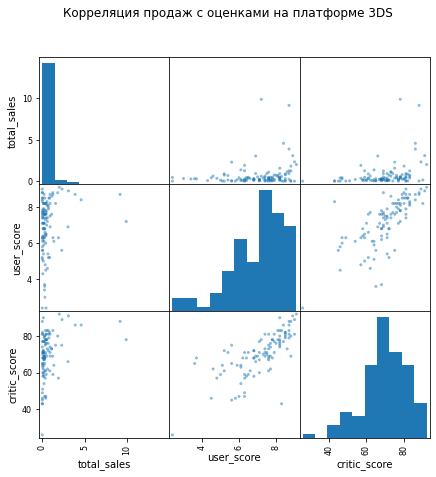

In [ ]:
# Вычислим корреляции для  для платформы '3DS' и и построим  диаграмму
corr_3ds = actual_data_games.query('platform == "3DS"')[['total_sales','user_score', 'critic_score']]
pd.plotting.scatter_matrix(corr_3ds, figsize=(7, 7));
plt.suptitle ('Корреляция продаж с оценками на платформе 3DS')
corr_3ds.corr()

Корреляция между user_score и total_sales для платформы "XOne": -0.06892505319711208 \
Корреляция между critic_score и total_sales для платформы "XOne": 0.41699832800840175

Корреляция между user_score и total_sales для платформы "3DS": 0.19814961706058065 \
Корреляция между critic_score и total_sales для платформы "3DS": 0.32045778764077804


**По результату  анализа еще двух актуальных платформам можно сказать, что ситуация схожа \
Оценки критиков оказывают небольшое влияние на продажи, а вот влияние оценок пользователей на продажи  - отсутствует**

**•	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**


In [ ]:
#создадим сводную таблицу и посмотрим как распределяются игры по жанрам за весь период
all_genre = data_games.pivot_table(index='genre', values='total_sales',aggfunc=['sum','count'])
all_genre.columns = ['sum','count']
all_genre = all_genre.sort_values(by='sum',ascending=False)
all_genre

,sum,count
genre,,
Action,1744.17,3369
Sports,1331.27,2348
Shooter,1052.45,1323
Role-Playing,934.56,1498
Platform,827.77,888
Misc,802.51,1750
Racing,728.67,1249
Fighting,447.53,849
Simulation,389.97,873


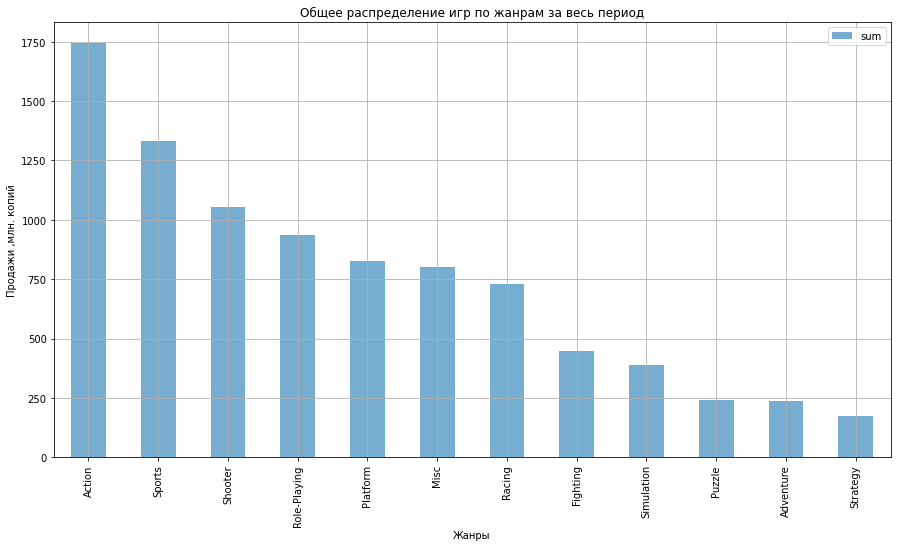

In [ ]:
#построим диаграмму
all_genre.plot(kind = 'bar',y='sum',grid=True,figsize = (15,8),linewidth= 5,alpha=0.6)
plt.title('Общее распределение игр по жанрам за весь период')
plt.xlabel('Жанры')
plt.ylabel('Продажи ,млн. копий');

По общему распределению игр по жанрам:
* можно выделить топ-4  прибыльных жанров - **Action, Sports,Shooter,Role-Playing**
* Самым прибыльным можно считать жанр - **Action**, жанр с самыми низкими продажами - **Strategy**
* Есть жанры , по которым выпускается много игр, но тем неменее количество продаж не высокое, возможно это связанно с неактуальностью жанров

Посмотрим, изменился ли список прибыльных жанров в разрезе актуального для нас периода (за 2012-2016 год)

In [ ]:
#создадим похожую сводную таблицу по актуальному периоду
genre_actual_time= actual_data_games.pivot_table(index='genre', values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False)
genre_actual_time

,total_sales
genre,
Action,446.41
Shooter,304.75
Role-Playing,192.80
Sports,181.07
Misc,85.28
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


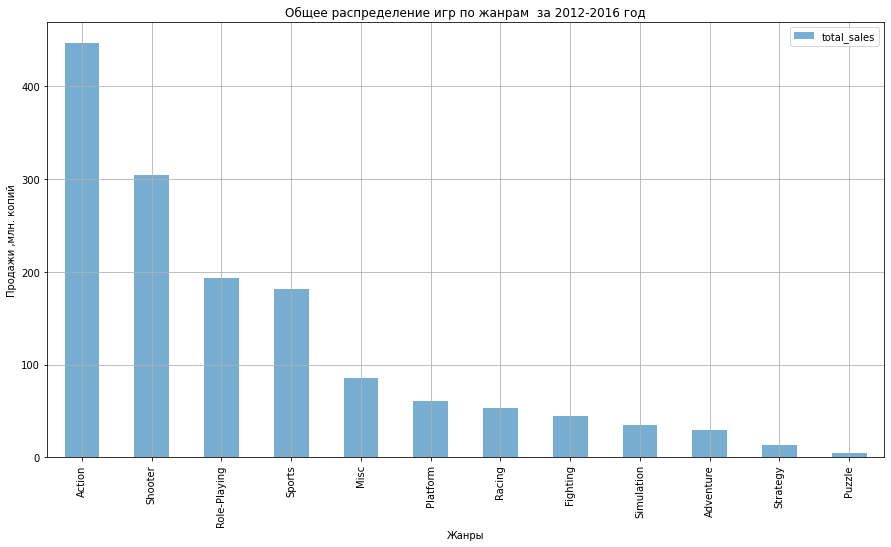

In [ ]:
#построим диаграмму для наглядности
genre_actual_time.plot(kind = 'bar',grid=True,figsize = (15,8),linewidth= 5,alpha=0.6)
plt.title('Общее распределение игр по жанрам  за 2012-2016 год')
plt.xlabel('Жанры')
plt.ylabel('Продажи ,млн. копий');

Порядок жанров по прибыльности немного изменился.
* в ТОП-4 жанра вошли те же жанры **Action, Shooter,Role-Playing,Sports**
* Жанр **Action** занимает все ту же лидирующую позицию по продажам, в то время как жанр **Sports** сместился на четвертую позицию. \
Возможно это связано с тем, что за выбранный(актуальный) период игры в жанре *Role-Playing* вышли на новый уровень по графике и сюжету, что вызвало интерес игроков

**Вывод**

Мы провели исследовательский анализ по предоставленным данным об игровой индустрии

* Предостаавленные данные за достаточно большой период с 1980 по 2016. Отметили, что активное развитие игровой индустрии началось в средене 90х годов, стремительный рост происходил в период 2002-2011 годов. Верояно в этот период технологические возможности и потребности пользователей вышли на новый уровень.

* Увидели как происходила смена одной актуальной платформы на другую по мере развития технологий и индустриию \
  в среднем актуальность платформ 8 - 10 лет. Наиболее популярными платформами можно считать Xbox и Sony Playstation,

* Выбрали актуальный  период для дальнейшего анализа и создания прогнозов на 2017 год
   * потенциально прибыльными в этом периоде можно считать платформы PS4 и XOne, также шансы есть у платформы 3DS
   * продажи по платформама предыдущих поколейний и не только (PC,PS3,PSV,Wii,WiiU,X360) идут на спад
   
* Построили графики распределения по потенциально прибыльным платформам

* Изучили влияние отзывов критиков и пользователей на продажи наТОП-3 выбранных платформах. (PS4 и XOne,3DS)
  По результату анализа можно скахать, что влияние отзывов критиков на продажи слабо коррелирует, отзывов пользовотелей вообще отсутствует
  
* Изучили распределение  топовых жанров жанров для всего датасета и актуального для нас периода.
  В обоих случаях лидирующую позицию занял жанр 'Action', а порядок остальных данных несколько изменился.


# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Выведем ТОП-5 популярных платформ для игроков каждого региона.**

Для этого сгруппируем данные и построим диаграмму


,jp_sales,ratio
platform,,
3DS,87.79,0.51
PS3,35.29,0.20
PSV,21.04,0.12
PS4,15.96,0.09
WiiU,13.01,0.08


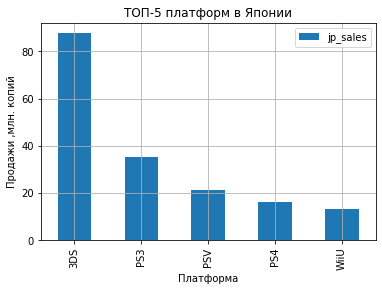

In [ ]:
#выведем топ-5 платформ для Японии
jp_platform = actual_data_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values('jp_sales',ascending=False).head(5)

# добавим столбец с долей от общей суммы продаж по платформам и округлим до 2х знаков
jp_platform['ratio'] = round(jp_platform['jp_sales']/ jp_platform['jp_sales'].sum(),2)

display(jp_platform)
jp_platform.plot(kind='bar',y='jp_sales',title='ТОП-5 платформ в Японии',grid=True)
plt.xlabel('Платформа')
plt.ylabel('Продажи ,млн. копий');

,eu_sales,ratio
platform,,
PS4,141.09,0.34
PS3,107.27,0.26
X360,74.89,0.18
XOne,51.59,0.12
3DS,42.83,0.10


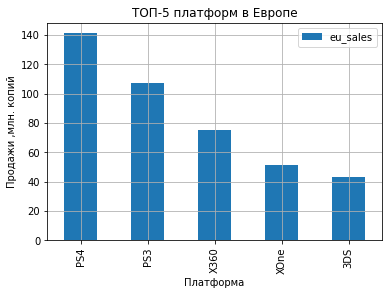

In [ ]:
#выведем топ-5 платформ для Европы
eu_platform = actual_data_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values('eu_sales',ascending=False).head(5)

# добавим столбец с долей от общей суммы продаж по платформам
eu_platform['ratio'] = round(eu_platform['eu_sales']/ eu_platform['eu_sales'].sum(),2)

display(eu_platform)
eu_platform.plot(kind='bar',y='eu_sales',title='ТОП-5 платформ в Европе',grid=True)
plt.xlabel('Платформа')
plt.ylabel('Продажи ,млн. копий');

,na_sales,ratio
platform,,
X360,140.57,0.28
PS4,108.74,0.22
PS3,103.74,0.21
XOne,93.12,0.19
3DS,55.49,0.11


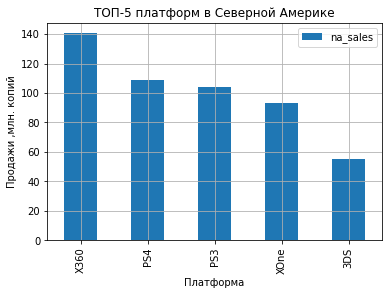

In [ ]:
#выведем топ-5 платформ для  Северной Америки
na_platform =actual_data_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values('na_sales',ascending=False).head(5)


# добавим столбец с долей от общей суммы продаж по платформам
na_platform['ratio'] = round(na_platform['na_sales']/ na_platform['na_sales'].sum(),2)

display(na_platform)
na_platform.plot(kind='bar',y='na_sales',title='ТОП-5 платформ в Северной Америке',grid=True);
plt.xlabel('Платформа')
plt.ylabel('Продажи ,млн. копий');

Популярность платформ в разных решионах несколько отличается.
* В Японии самой популярной платформой является 3DS(Nintendo) и по всей видимости, в целом пользователи отдают больше предпочтение портативным приставкам (на третем месте видим платформу PSV)

* В Еропе, наиболее популярной платформой является Playstation(PS4 и PS3), несколько отстает ее аналог от Майкрософт - Xbox (X360)

* В Северной америке предпочтение отдают больше платформе Xbox(X360), но и Playstation не сильно отстает по числу продаж.По Всей видимости на американском ранке гейм индустрия развивается существенно быстрее.

*** Выведем ТОП-5 популярных жанров для пользователя каждого региона**

создадим сводную таблицу  и посмотрим рейтинг продаж по жанру   в каждом регионе

,jp_sales,ratio
genre,,
Role-Playing,65.44,0.43
Action,52.80,0.35
Misc,13.10,0.09
Simulation,10.41,0.07
Fighting,9.44,0.06


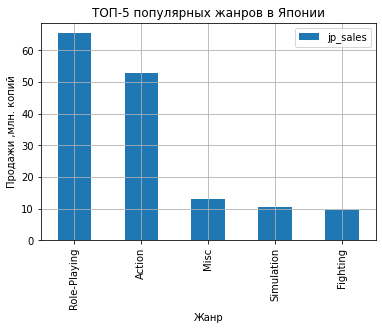

In [ ]:
jp_genre = actual_data_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values('jp_sales',ascending=False).head(5)

# добавим столбец с долей от общей суммы продаж по жанрам
jp_genre['ratio'] = round(jp_genre['jp_sales']/ jp_genre['jp_sales'].sum(),2)

display(jp_genre)
jp_genre.plot(kind='bar',y='jp_sales',title='ТОП-5 популярных жанров в Японии',grid=True)
plt.xlabel('Жанр')
plt.ylabel('Продажи ,млн. копий');

,eu_sales,ratio
genre,,
Action,161.70,0.38
Shooter,113.47,0.27
Sports,69.09,0.16
Role-Playing,48.53,0.12
Racing,27.29,0.06


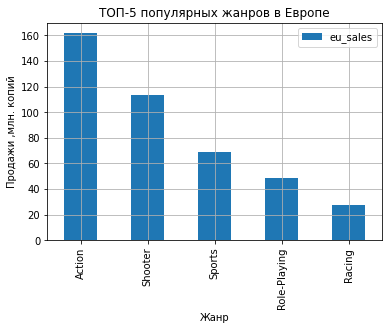

In [ ]:
eu_genre = actual_data_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values('eu_sales',ascending=False).head(5)

# добавим столбец с долей от общей суммы продаж по жанрам
eu_genre['ratio'] = round(eu_genre['eu_sales']/ eu_genre['eu_sales'].sum(),2)

display(eu_genre)
eu_genre.plot(kind='bar',y='eu_sales',title='ТОП-5 популярных жанров в Европе',grid=True)
plt.xlabel('Жанр')
plt.ylabel('Продажи ,млн. копий');

,na_sales,ratio
genre,,
Action,180.15,0.35
Shooter,144.79,0.28
Sports,81.53,0.16
Role-Playing,64.00,0.13
Misc,38.19,0.08


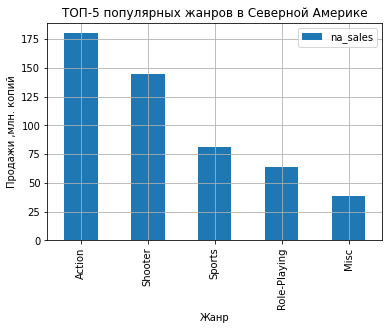

In [ ]:
na_genre = actual_data_games.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values('na_sales',ascending=False).head(5)

# добавим столбец с долей от общей суммы продаж по жанрам
na_genre['ratio'] = round(na_genre['na_sales']/ na_genre['na_sales'].sum(),2)


display(na_genre)
na_genre.plot(kind='bar',y= 'na_sales',title='ТОП-5 популярных жанров в Северной Америке',grid=True)
plt.xlabel('Жанр')
plt.ylabel('Продажи ,млн. копий');

* Распределение по популярности жанров в Европе и Северной Америки практически одинаковое.Большинство пользователей отдают предпочтение жанру 'Action', затем идут 'Shooter','Sport' и 'Role-Playing'

* Японские пользователи несколько отличаются своими интересами, наиболее популярный жанр - 'Role-Playing'. Также среди популярных жанров можно увидеть жанры 'Simulation' и 'Fighting'


**Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе**

In [ ]:
#выведем сводную таблику с рейтингами и посмотрим взаимосвязь с продажам
region_rating = actual_data_games.pivot_table(index='rating', values=['jp_sales','eu_sales','na_sales'], aggfunc='sum')
region_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,57.25,8.19,77.93
M,194.44,21.20,231.67
T,52.96,26.02,66.02
unknown,91.50,109.08,103.31


,jp_sales,ratio
rating,,
unknown,109.08,0.57
E,28.33,0.15
T,26.02,0.13
M,21.20,0.11
E10+,8.19,0.04


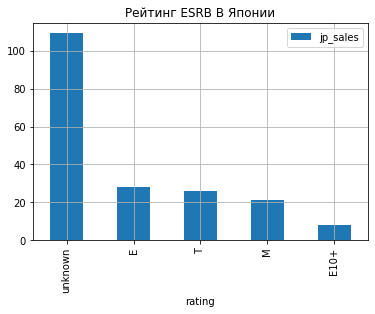

In [ ]:
#выведем сводную таблицу с рейтингом  и посмотрим взаимосвязь с продажами (по аналогии с платформами и жанрами)
jp_rating  = actual_data_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').\
sort_values('jp_sales',ascending=False)

# добавим столбец с долей от общей суммы продаж
jp_rating['ratio'] = round(jp_rating['jp_sales']/ jp_rating['jp_sales'].sum(),2)

display(jp_rating)
jp_rating.plot(kind='bar',y='jp_sales',title='Рейтинг ESRB В Японии',grid=True);


,eu_sales,ratio
rating,,
M,194.44,0.38
E,113.03,0.22
unknown,91.50,0.18
E10+,57.25,0.11
T,52.96,0.10


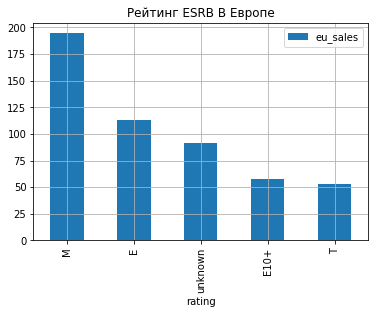

In [ ]:
eu_rating  = actual_data_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').\
sort_values('eu_sales',ascending=False)

# добавим столбец с долей от общей суммы продаж
eu_rating['ratio'] = round(eu_rating['eu_sales']/ eu_rating['eu_sales'].sum(),2)

display(eu_rating)
eu_rating.plot(kind='bar',y='eu_sales',title='Рейтинг ESRB В Европе',grid=True);


,na_sales,ratio
rating,,
M,231.67,0.39
E,114.37,0.19
unknown,103.31,0.17
E10+,77.93,0.13
T,66.02,0.11


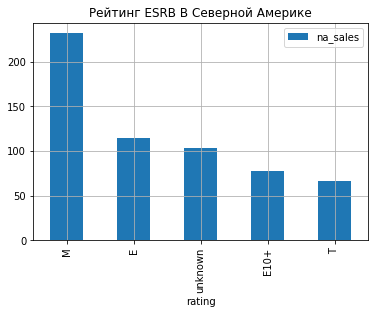

In [ ]:
#создадим сводную таблицу и посчитаем сумму продаж по рейтингам в СЕверной Америке
na_rating  = actual_data_games.pivot_table(index='rating', values='na_sales', aggfunc='sum').\
sort_values('na_sales',ascending=False)

# добавим столбец с долей от общей суммы продаж
na_rating['ratio'] = round(na_rating['na_sales']/ na_rating['na_sales'].sum(),2)

display(na_rating)
na_rating.plot(kind='bar',y='na_sales',title='Рейтинг ESRB В Северной Америке',grid=True);

Рейтинг возраста влияет по каждому региону.
* В Европе и Северной Америке рейтинги распределились одинаково. Лидирует рейтинг 'M' - игры для пользователей 17+, затем игры с рейтингом 'E' и 'E10+'.Есть доля игр без рейтинга которые пользуются популярностью.

В целом ситуация выглядит так, что Западно-Европуйский рынок нацелен на взрослых пользователей и подростков

* В Японии наибольшее количество продаваемых игр  с неуказанным рейтингом, затем распологаются игры с рейтингом 'E' и 'T'.
В японии есть своя негосударственная организация **CERO** которая устанавливает рейтинги видеоигр, возможно большинство игр без рейтинга популярны в основном для этого региона.


**Вывод**

Провели  анализ трех регионов,на оскновании которого можно сказать, что заметна разница в предпочтениях  пользователей.


* Европейские пользователи, в целом, большее предпочтение отдают Sony Playstation (с долей 60% от от общих продаж), на втором месте идет XboX (с долей 30%) и лишь 10% приходится на платформу Nintendo 3DS.
В качестве популярного жанра  - Европейские пользователи отдают препочтение жанрам Action и Shooter.
Говоря о возрасте игроков, в большей степени это игроки от 17 лет (рейтинг 'М'  занимает большую долю),на втором месте по рейтенгу расположились игры с рейтингом для всех(рейтинг 'E')

* Американские пользователи разделяют предпочтение примерно в равных пропорциях между платформами Microsoft Xbox и Sony Playstation и также  примерно 10% доли от продаж приходится на платформу Nintendo 3DS. Популярные жанры схожи  с предпочтениями европейцев. На американском рынке, говоря о возрасте игроков,ситуация похожа, больнинство игрдля взрослых, от 17 лет, но также доля игр для всех возрастов занимает второе место.

* Японские пользователи в целом отдают предпочтение изобретениям своей страны (Nintendo и Sony Playstation).Что сильно отличает Японимаю -  самой популяной платформой стала Nintendo 3DS  - это портативная приставка, ей принадлежит более 50% доли от продаж.В выборе жарна японские пользователи также  несколько отличаются, наиболее популярный жанр - 'Role-Playing', также в число популярных входят нетипичные Американце и Европейцев жанры -  'Simulation' и 'Fighting'. Оценить возраст игроков по рейтингу сложнее, большинство продаваемых игр без рейтинга организации ESRB, но в целом на японском рынке возраст игроков 13+



# Шаг 5. Проверьте гипотезы
Задайте самостоятельно пороговое значение alpha.\
Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.


***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую и альтернативную гипотезы:\
H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые \
H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются

alpha = 0.05

In [ ]:
#сгруппируем данные по платформам и посмотрим описание данных
xbox_one = actual_data_games[(actual_data_games['platform'] == 'XOne') & (actual_data_games['user_score'] > 0)]['user_score']
pc = actual_data_games[(actual_data_games['platform'] == 'PC') & (actual_data_games['user_score'] > 0)]['user_score']
print(xbox_one.describe())
pc.describe()


count    182.000000
mean       6.521428
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64


count    211.000000
mean       6.445498
std        1.657455
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Размер полученных выборок отличается, отзывов пользователей PC несколько больше чем пользователей Xbox One.
Расcчитаем дисперсии для переменных

In [ ]:
# Раcсчет дисперсии для переменной xbox_one
var_xbox_one = xbox_one.var()

# Расcчет дисперсии для переменной pc
var_pc = pc.var()
print("Дисперсия xbox_one:", var_xbox_one)
print("Дисперсия  pc:", var_pc)

Дисперсия xbox_one: 1.9069968
Дисперсия  pc: 2.7471583


Для проверки гипотезы о равенстве среднего двух генеральных совокупностей повзятым выборкам будем использовать метод `st.stats.ttest_ind` \
Параметр `equal_var` = False

In [ ]:
alpha = 0.05 #уровень статистической значимости
#если p-value окажется меньше, отвергнем нулевую гипотезу
results = st.ttest_ind(xbox_one,pc,equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6206382196825821
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Значимой разницы между средним пользователемским рейтингом платформы Xbox One и PC нет.

*** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Сформулируем нулевую и альтернативную гипотезы:\
H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые \
H1 - Средние пользовательские рейтинги жанров Action и Sports различаются

alpha = 0.05

In [ ]:
#сгруппируем данные по жанрам и посмотрим описание данных
action = actual_data_games[(actual_data_games['genre'] == 'Action') & (actual_data_games['user_score'] > 0)]['user_score']
sports = actual_data_games[(actual_data_games['genre'] == 'Sports') & (actual_data_games['user_score'] > 0)]['user_score']
print(action.describe())
sports.describe()


count    531.000000
mean       6.834275
std        1.371830
min        1.600000
25%        6.250000
50%        7.200000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64


count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Размер полученных выборок сильно отличается, отзывов пользователей по жанру Action  больше чем по жанру Sports.
Расcчитаем дисперсии для переменных

In [ ]:
# Раcсчет дисперсии для переменной xbox_one
var_action  = action.var()

# Расcчет дисперсии для переменной pc
var_sports = sports.var()
print("Дисперсия action:", var_action)
print("Дисперсия  sports:", var_sports)

Дисперсия action: 1.8819174
Дисперсия  sports: 3.0228903


Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым выборкам будем  также использовать метод st.stats.ttest_ind
Параметр equal_var = False

In [ ]:
alpha = 0.05 #уровень статистической значимости
#если p-value окажется меньше, отвергнем нулевую гипотезу
results = st.ttest_ind(action,sports,equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.337084905889137e-20
Отвергаем нулевую гипотезу


**Вывод:** Отвергли нулевую гипотезу, средние пользовательские рейтиги у жанров Action и Sports различаются

# Шаг 6. Общий вывод

**Мы провели анализ данных по предоставленным данным об игровой индустрии и выпольнили поставленные цели.**

**В данном проекте был импортирован датафрейм с данным об игровой индустрии с 1980 по 2016 год.
В нем представленны данные: **
- о названиях игр
- платформах на которых они выпускались
- продажи в млн.копий по регионам (EU,NA,JP и Other)
- жанрах
- оценках критиков и пользователях
- возрастные рейтинги

**Мы произвели предобработку данных, в ходе которой:**
- привели название столцов к единому стилю
- обработали возможные пропуски в данных и описали предположения об их появлении
- изменили типы данных в столбцах (в столбце `year_of_release` изменили на целочисленный тип - 'int', в столбце `user_score` на вещественный тип - 'float')
- добавили новый столбец с суммарной выручкой продаж по всем регионам - `total_sales`

**Далее провели исследовательский анализ, в ходе которого:**

- Выяснили, что активное развитие игровой индустрии началось в середине 90-х готов, а стремительный рост замечен в период 2002-2012 годов. Вероятно это связано с тем, что  технологии шагнули вперед и начали стремительно развиваться в этот период, появились новые производственные мощности.

- Увидели как сменялись платформы по мере развития технологий, в среднем актуальность платформы ~ **8-10 лет.**

- Определили, что для построения прогноза на 2017 году будет наиболее актуально рассматривать данные за период с 2012 по 2016 года
   * потенциально прибыльными в этом периоде можно считать платформы PS4 и XOne, также шансы есть у платформы 3DS
   * продажи по платформама предыдущих поколейний и не только (PC,PS3,PSV,Wii,WiiU,X360) идут на спад
   
- Выбрали ТОП - 3 актуальные платформы.*(PS4 и XOne,3DS)**

- Построили графики распределения по потенциально прибыльным платформам. Выяснили, что  отзывы критиков слабо коррелируют с продажами игр, а корреляция продажи игр с отзывами пользователей отсутствует

- Изучили распределение топовых жанров жанров для всего датасета и актуального для нас периода. Жанр `Action` не теряет свою популярность сквозь года.
  В ТОП-4 жанра, на актуальны выбранный период входят:
  - Action
  - Shooter
  - Role-Playing
  - Sports

**Составили портреты пользователей по трем крупным регионам (Европа, Северная Америка,Япония)**

* Европейские пользователи, представляют собой по большей степени игроков 17+, которые выбирают   Sony Playstation (60% доля от продаж) и XboX(30% доля от продаж).\
В ТОП -5 жанров входят:**Action,Shooter,Sports,Role-Playing,Racing**

* Американские пользователи, представляют собой по большей степени игроков 17+, которые отдают большее предпочтение Xboxб но также практическе на уровне и  Sony Playstation,во многом схожи с европейскими пользователями.
Распределение популярных жанров схоже вс европейцами. \
В ТОП -5 жанров входят:**Action,Shooter,Sports,Role-Playing,Racing**

* Японские пользователи, представляют собой игроков 13+ и отдают предпочтение изобретениям своей страны (Nintendo и Sony Playstation).Что сильно отличает Японию.
Самой популяной платформой стала Nintendo 3DS  - это портативная приставка, ей принадлежит более 50% доли от продаж.
В выборе жарна японские пользователи также  несколько отличаются.\
ТОП-5 жанров: **Role-Playing, Action, Misc, Simulation, Fighting**


**Проверили две гипотезы, заявленные в самом начале исследования. В результате выяснили:**

* Значимой разницы между средним пользователемским рейтингом платформы Xbox One и PC нет

* гипотеза о различии средних значений пользовательских оценок игр двух жанров Action и Sports подтвердилась.


**Рекомендации для проведения рекламных компаний для интернет-магазина "Стримчик" на 2017 год**

На основе проведенного анализа, можно сказать, что самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One от Microsoft, а также платформа Nintendo 3DS

* Для европейского рынка рынка рекомендую сделать акцент на игры  для платформы **PS4**, с жанровым предпочтением  игр -  **Action,Shoters и Sports **

* Для американского рынка следует сделать акцент на игры  для платформы **Xbox One**, с жанровым предпочтением  игр -  **Action,Shoters и Sports **

* Для японского рынка рекомендую направить внимание на платформу Nintendo 3DS, с большим акцентом на игры жанром **Role-Playing и Action**

Следует также уделять внимания аудитории. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.

А также не забывать распространять игры и портации игр с популярных платформ на PC.(Персональный ПК все еще пользуется спросом во многих регионах.)

